from thesis_figures/Fig4_0

In [15]:
import sys
sys.path.append('/Users/celia/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/celia/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
record = pd.read_csv('/Users/celia/GitHub/mouse_bandit/celia_session_record.csv',index_col=0)

In [17]:
record.shape

(701, 18)

### Load in data and track performance for mice across days
    mice = numpy, names of all mice included in analysis
    x = numpy, number of days plotted
    y_temp = subset of data - probability mouse chose high port at designated reward probability condition
    y = numpy, fraction high port chosen in past x days for given condition

6


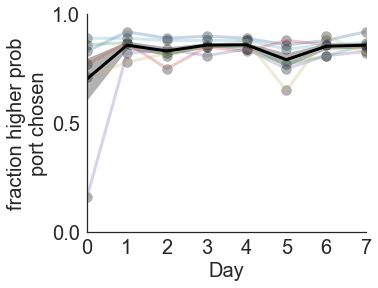

In [18]:
#mice = ['Baby','Sky','Raspberry','Wine','Mustard']
mice = np.unique(record['Mouse ID'].values) # get names of all mice in record
#mice = np.delete(mice,np.where(mice=='Dill')) # to exclude Dill until he's trained

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(5,4))
y = np.empty((mice.shape[0],10))
x = np.arange(0,10) # number of days to plot
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.9) | (record['Left Reward Prob'] == 0.1)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:] # values of fraction high port chosen for last 10 days
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)

plt.plot(x,y.mean(axis=0),color='black',linewidth=3)
err = y.std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y.mean(axis=0)+err,y2=y.mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [19]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward']
data = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/trial_data/09262017_Mustard_trials.csv',names=columns)

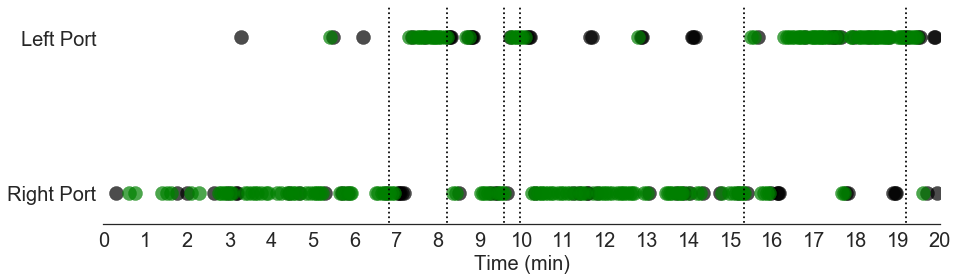

In [20]:
block_start_trials = np.where(np.abs(np.diff(data['Right Reward Prob'].values))!=0)
block_start_times = data['Elapsed Time (s)'].values[block_start_trials[0]]

num_trials = 1600
sns.set_style('white')
plt.figure(figsize=(15,4))
plt.vlines(block_start_times,ymin=0,ymax=3,linestyle='dotted')
plt.scatter(data[data['Reward'] == 0]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 0]['Port Poked'].values[:num_trials],color='black',s=200,alpha=0.7)
plt.scatter(data[data['Reward'] == 1]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 1]['Port Poked'].values[:num_trials],color='green',s=200,alpha=0.7)
plt.xticks(np.arange(0,1700,60),list(map(int,np.arange(0,1700/60))),fontsize=20)
plt.yticks([1,2],['Right Port','Left Port'],fontsize=20)
plt.xlim(-1,1201)
plt.xlabel('Time (min)',fontsize=20)
plt.ylim(0.8,2.2)
sns.despine(left=True)
#fig_name = '/Users/shayneufeld/Dropbox/Thesis/CHPT4/Figures/singlesession.eps'
#plt.savefig(fig_name, format='eps', dpi=1000)

In [21]:
data=pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_master.csv',index_col=0)

In [22]:
data.shape

(259890, 53)

In [23]:
data90 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_9010_df.csv',index_col=0)
data80 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_8020.csv',index_col=0)
data70 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_7030.csv',index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'
datas = data90.append(data80)
datas = datas.append(data70)

# add single index sequence for all rows
datas = datas.reset_index()
data=datas.copy()

In [24]:
data.tail(5)

,index,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,...,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition
276111,788,Dill,01262018_Dill,799.0,79.0,43.0,1.0,1.0,0.0,1.0,...,1.0,7.818,0.650,1.258,0.583,0.0,0.0,1.0,0.0,70-30
276112,789,Dill,01262018_Dill,800.0,80.0,43.0,2.0,-1.0,1.0,0.0,...,0.0,1.258,0.583,29.830,0.640,1.0,1.0,0.0,0.0,70-30
276113,790,Dill,01262018_Dill,801.0,81.0,43.0,1.0,-2.0,0.0,1.0,...,0.0,29.830,0.640,1.491,0.307,1.0,0.0,0.0,0.0,70-30
276114,791,Dill,01262018_Dill,802.0,82.0,43.0,2.0,-3.0,0.0,0.0,...,0.0,1.491,0.307,12.839,0.566,1.0,0.0,0.0,1.0,70-30
276115,792,Dill,01262018_Dill,803.0,83.0,44.0,3.0,1.0,1.0,1.0,...,1.0,12.839,0.566,1.426,0.689,1.0,0.0,0.0,0.0,70-30


In [25]:
session

'02272018_Baby'

In [26]:
#record_path_9010 = '/Users/celia/GitHub/mouse_bandit/data/processed_data/trials_markov_9010.csv' # session record of behavioral data
#record_9010 = pd.read_csv(record_path_9010,index_col=0) # session record is panda df
#record_path_8020 = '/Users/celia/GitHub/mouse_bandit/data/processed_data/trials_markov_8020.csv' # session record of behavioral data
#record_8020 = pd.read_csv(record_path_8020,index_col=0) # session record is panda df

#record = record_9010.append(record_8020)

columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked',
           'Right Reward Prob','Left Reward Prob','Reward Given',
          'center_frame','decision_frame', 'Block ID']

for session in np.unique(data['Session ID'])[:]:
    
    # load in data from a particular session
    record[record['Session ID'] == session] # take only rows from record that match session name
    root_dir = '/Users/celia/GitHub/mouse_bandit/data/trial_data'
    full_name = session + '_trials.csv'
    path_name = os.path.join(root_dir,full_name)
    trial_df = pd.read_csv(path_name,names=columns) # load in full dataset from a single trial
    
    # determine block lengths and attach block id to each trial
    # identify blocks by trials where right reward probability changes
    blocks = list(np.diff(np.concatenate((range(1),np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0]+2))))
    
    try: 
        #np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0][-1]
        blocks.append(int(record[record['Session ID']==session]['No. Trials'].values)
                 -np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0][-1]-1) # length of the last block at end
        block_id = np.asarray([x+1 for x in range(int(record[record['Session ID']==session]['No. Blocks'].values[0])+1)
            for y in range(blocks[x])])

        trial_df['Block ID'] = block_id[:-1] # add column in trial_df for block id
        
        # add block id and current block length to dataframe
        data.loc[data[data['Session ID']==session].index, 'Block ID'] = block_id[11:]
        temp = [blocks[x-1] for x in block_id[11:]]
        data.loc[data[data['Session ID']==session].index, 'Current Block Length'] = temp
    
    except IndexError: # report any errors - days when no blocks were completed
        print('No blocks in %s' %session)

data.tail(5)

,index,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,...,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition,Block ID,Current Block Length
276111,788,Dill,01262018_Dill,799.0,79.0,43.0,1.0,1.0,0.0,1.0,...,0.650,1.258,0.583,0.0,0.0,1.0,0.0,70-30,14.0,84.0
276112,789,Dill,01262018_Dill,800.0,80.0,43.0,2.0,-1.0,1.0,0.0,...,0.583,29.830,0.640,1.0,1.0,0.0,0.0,70-30,14.0,84.0
276113,790,Dill,01262018_Dill,801.0,81.0,43.0,1.0,-2.0,0.0,1.0,...,0.640,1.491,0.307,1.0,0.0,0.0,0.0,70-30,14.0,84.0
276114,791,Dill,01262018_Dill,802.0,82.0,43.0,2.0,-3.0,0.0,0.0,...,0.307,12.839,0.566,1.0,0.0,0.0,1.0,70-30,14.0,84.0
276115,792,Dill,01262018_Dill,803.0,83.0,44.0,3.0,1.0,1.0,1.0,...,0.566,1.426,0.689,1.0,0.0,0.0,0.0,70-30,14.0,84.0


In [27]:
data_match_blocks = data[data['Current Block Length']<90] # take only blocks with fewer than 90 trials
data_match_blocks = data_match_blocks[data_match_blocks['Current Block Length']>50] # blocks with 30+ trials
datas = data_match_blocks.copy()

In [28]:
datas.shape

(86619, 57)

In [29]:
len(np.unique(datas['Session ID']))

363

In [30]:
temp = np.diff(datas['Block ID'].values)
print('# blocks =', np.sum(np.abs(temp)>0))

# blocks = 1258


In [31]:
np.mean(datas['Current Block Length'])

70.98322538934876

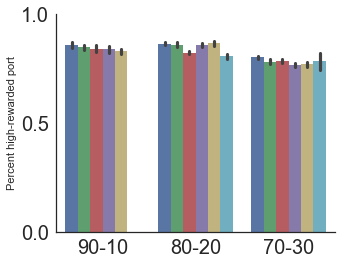

In [32]:
#ax2 = sns.barplot(x='Condition',y='Higher p port',data=datas)
plt.figure(figsize=(5,4))
ax1 = sns.barplot(x='Condition',y='Higher p port',data=datas[datas['Condition'] != '100-0'], hue='Mouse ID')
plt.yticks([0,0.5,1.0],fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Percent high-rewarded port')
plt.xlabel('')
ax1.legend_.remove()
sns.despine()

In [33]:
data.head(5)

,index,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,...,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition,Block ID,Current Block Length
0,0,Baby,08162017_Baby,11.0,11.0,6.0,1.0,2.0,0.0,1.0,...,0.430,1.277,0.557,0.0,0.0,1.0,1.0,90-10,1.0,69.0
1,1,Baby,08162017_Baby,12.0,12.0,7.0,2.0,3.0,1.0,0.0,...,0.557,46.032,0.383,1.0,1.0,0.0,0.0,90-10,1.0,69.0
2,2,Baby,08162017_Baby,13.0,13.0,7.0,1.0,-1.0,0.0,0.0,...,0.383,1.413,0.447,1.0,0.0,0.0,0.0,90-10,1.0,69.0
3,3,Baby,08162017_Baby,14.0,14.0,7.0,2.0,-2.0,0.0,1.0,...,0.447,5.433,0.488,1.0,0.0,0.0,1.0,90-10,1.0,69.0
4,4,Baby,08162017_Baby,15.0,15.0,8.0,3.0,1.0,1.0,0.0,...,0.488,2.283,0.391,1.0,0.0,0.0,0.0,90-10,1.0,69.0


In [34]:
session_ids = np.unique(datas['Session ID'].values)
block_trials_ = np.array([])
for session in session_ids:
    data = datas[datas['Session ID']==session].copy()
    block_ends = data['Trial'].values[np.where(data['Block Trial'].values==0)[0]]
    
    for trial in data.iterrows():
        try:
            block_trial = block_ends[np.where(block_ends > trial[1]['Trial'])[0][0]] - trial[1]['Block Trial']
        except:
            block_trial = 0
        block_trials_ = np.append(block_trials_,block_trial)

In [35]:
datas['Block Trial Rev'] = datas['Block Trial'].values - datas['Current Block Length'].values

In [36]:
block_trials = np.unique(datas['Block Trial'].values)
conditions = np.unique(datas['Condition'].values)
#mice = np.unique(datas.index)
p = np.zeros((block_trials.shape[0],2))
trial_stats = pd.DataFrame(data=None)
for condition in conditions:
        for i,trial in enumerate(block_trials):
            d = datas[datas['Condition']==condition]
            #d = d[d['Mouse ID']==mouse]
            d = d[d['Block Trial']==trial]
            '''
            boolean = (((datas['Block Trial'] == trial) 
                    & (datas['Condition']==condition))
                    & (datas['Mouse ID'] == mouse))
            
            t = datas[boolean]['Higher p port'].values
            '''
            t = d['Higher p port'].values
            p[i,0] = t.mean()
            p[i,1] = t.std()/np.sqrt(t.shape[0])

            d = {'Condition':condition,'trial':trial,
                 'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
            trial_stats = trial_stats.append(pd.DataFrame(data=d,index=[0]))

In [37]:
block_trials_rev = np.unique(datas['Block Trial Rev'].values)
conditions = np.unique(datas['Condition'].values)
p = np.zeros((block_trials_rev.shape[0],2))
trial_stats_ = pd.DataFrame(data=None)

for condition in conditions:
    for i,trial in enumerate(block_trials_rev):
        t = datas[((datas['Block Trial Rev'] == trial) 
                   & (datas['Condition']==condition))]['Higher p port'].values
        p[i,0] = t.mean()
        p[i,1] = t.std()/np.sqrt(t.shape[0])
    
        d = {'Condition':condition,'trial':trial,'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
        trial_stats_ = trial_stats_.append(pd.DataFrame(data=d,index=[0]))
        
#trial_stats_['trial'] = trial_stats_['trial']*-1

/Users/celia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/celia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]


In [38]:
trial_stats_.tail(5)

,Condition,mean,n,sem,trial
0,90-10,0.926471,204,0.018274,-1.0
0,90-10,0.500000,2,0.353553,0.0
0,90-10,NaN,0,NaN,1.0
0,90-10,NaN,0,NaN,2.0
0,90-10,NaN,0,NaN,3.0


(array([  8779.,   7418.,   7494.,   8257.,   6769.,   9226.,   8471.,
          9834.,   9619.,  10752.]),
 array([ 51. ,  54.8,  58.6,  62.4,  66.2,  70. ,  73.8,  77.6,  81.4,
         85.2,  89. ]),
 <a list of 10 Patch objects>)

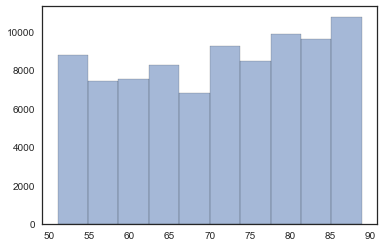

In [39]:
plt.hist(datas['Current Block Length'], histtype='bar', alpha=0.5, ec='black')

([<matplotlib.axis.XTick at 0x11b2a53c8>,
 <a list of 3 Text xticklabel objects>)

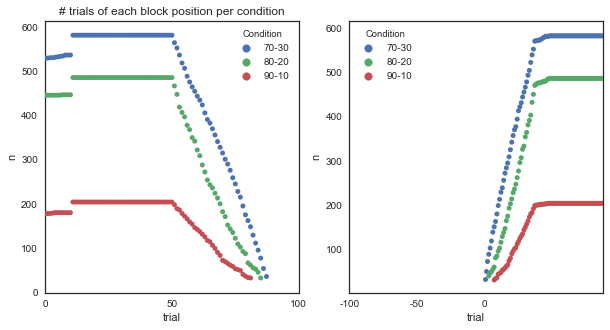

In [40]:
trial_stats = trial_stats[trial_stats['n'] > 30]
trial_stats_ = trial_stats_[trial_stats_['n'] > 30]

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats)
plt.xlim(0,100)
plt.xticks([0,50,100],[0,50,100])
plt.title('# trials of each block position per condition')

plt.subplot(122)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats_)
plt.title('')
#plt.xlim(-100,0)
plt.xticks([0,-50,-100],[0,-50,-100])

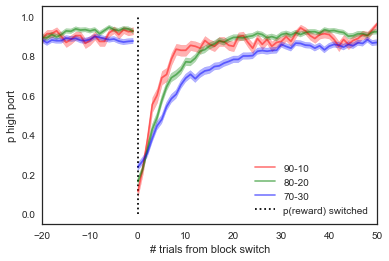

In [41]:
colors = ['red','green','blue','purple']
conditions=['90-10','80-20', '70-30']

for i,condition in enumerate(conditions):
    trial_stat = trial_stats[trial_stats['Condition']==condition]
    trial_stat_ = trial_stats_[trial_stats_['Condition']==condition]
    u = trial_stat['mean'].values
    e = trial_stat['sem'].values
    x = trial_stat['trial'].values
    
    u_ = trial_stat_['mean'].values
    e_ = trial_stat_['sem'].values
    x_ = trial_stat_['trial'].values
    
    plt.plot(x,u,color=colors[i],alpha=0.5,label=condition)
    plt.fill_between(x,y1=u-e,y2=u+e,color=colors[i],alpha=0.3)
    
    plt.plot(x_,u_,color=colors[i],alpha=0.5)
    plt.fill_between(x_,y1=u_-e_,y2=u_+e_,color=colors[i],alpha=0.3)
    
plt.vlines(x=0,ymin=0,ymax=1,linestyle='dotted',label='p(reward) switched')

plt.xlim(-20,50)
plt.legend(loc='lower right')
plt.xlabel('# trials from block switch')
plt.ylabel('p high port')

In [42]:
conditions = ['90-10', '80-20', '70-30']
u_avg_ = np.zeros(3)
e_avg_ = np.zeros(3)
for i,condition in enumerate(conditions):
    trials = trial_stats_[((trial_stats_['trial'] > -15) 
                           & (trial_stats_['trial'] < 0)
                           & (trial_stats_['Condition']==condition))]
    
    u_avg_[i] = trials['mean'].mean()
    e_avg_[i] = np.sqrt(np.sum(trials['sem'].values**2) / (trials.shape[0]-1))

In [43]:
np.where(u >= u_avg_[2])

(array([57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 78,
        79, 80, 81, 85, 86]),)

In [44]:
stats = pd.DataFrame()
for c in conditions:
    for mouse in mice:
        d = datas[((datas['Condition'] == c) & (datas['Mouse ID'] == mouse))]
        if (d['Session ID'].unique().shape[0] > 1):
            s = bp.extract_session_stats(d)
            s['mouse'] = mouse
            s['condition'] = c
            s['n_trials'] = d.shape[0]
            s['n_sessions'] = d['Session ID'].unique().shape[0]
            stats = stats.append(s)

In [45]:
#all the block numbers
data = d.copy()
t_block_unique = np.unique(data['Block Trial'].astype(int))

    # initialize matrix for p(switch) at every trial number in block. 2nd column for SEM
p_switch_block = np.zeros((t_block_unique.shape[0],2))

    # initialize matrix for p(high_p_port)
high_p_port = np.zeros_like(p_switch_block)

'''
calculate p(switch) for each trial # in block (from 0 -> end)
'''
for t in t_block_unique:
    switches = data[data['Block Trial'] == t]['Switch']
    p_switch_block[t,0] = switches.mean(axis=0)
    p_switch_block[t,1] = switches.std(axis=0) / np.sqrt(switches.shape[0])
        
    highport = data[data['Block Trial']==t]['Higher p port']
    high_p_port[t,0] = highport.mean(axis=0)
    high_p_port[t,1] = highport.std(axis=0) / np.sqrt(highport.shape[0])


'''
calculate p(switch) and p(high port) for trial #s in block (from -L to +L)
'''

data.index = np.arange(data.shape[0]) # <-- this is important
switch_points = data[data['Block Trial'] == 0].index.values

L = 30
paraswitch = np.zeros((switch_points.shape[0],L*2 + 1))
paraswitch_port = np.zeros_like(paraswitch)

for i,point in enumerate(switch_points):
    try:
        paraswitch[i,:] = data.iloc[point-L:point+L+1]['Switch']
        paraswitch_port[i,:] = data.iloc[point-L:point+L+1]['Higher p port']
    except:
        pass

/Users/celia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


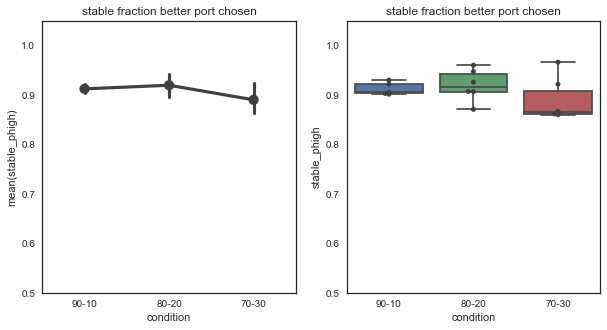

In [51]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='stable_phigh',color='.25',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

plt.subplot(122)
sns.boxplot(x='condition',y='stable_phigh',data=stats)
sns.swarmplot(x='condition',y='stable_phigh',data=stats,color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

/Users/celia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


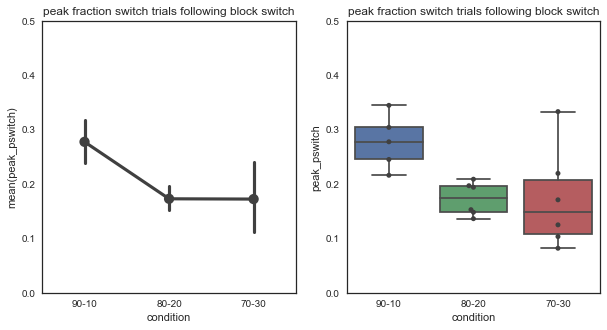

In [50]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='peak_pswitch',data=stats, color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='peak_pswitch',data=stats)
sns.swarmplot(x='condition',y='peak_pswitch',data=stats, color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

/Users/celia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


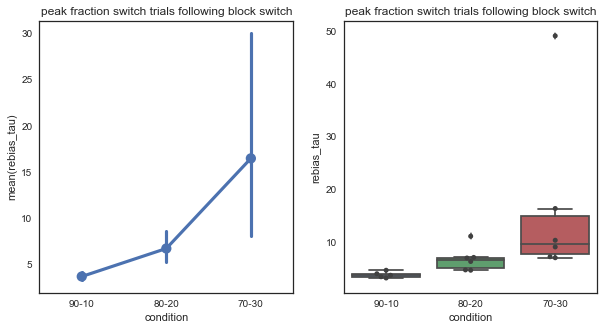

In [52]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='rebias_tau',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='rebias_tau',data=stats)
sns.swarmplot(x='condition',y='rebias_tau',data=stats,color='0.25')
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')